# Load Packages

In [1]:
# scikit-learn, scikit-image are needed
# If those packages are missed, then, install them by using the following command
# pip install scikit-learn scikit-image

import os

import sklearn.datasets
import sklearn.linear_model
import sklearn.svm
import sklearn.tree
import sklearn.ensemble
import sklearn.model_selection
import sklearn.metrics

import skimage.io
import skimage.transform
import skimage.color

import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline

# Load Additional Packages (if you want to use other modules in Scikit Learn)

In [2]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Load Data Points (Do not modify the following block)

In [3]:
image_size = 64
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

images = []
y = []
for i in labels:
    folderPath = os.path.join('./tumor_dataset/Training',i)
    for j in os.listdir(folderPath):
        img = skimage.io.imread(os.path.join(folderPath,j),)
        img = skimage.transform.resize(img,(image_size,image_size))
        img = skimage.color.rgb2gray(img)
        images.append(img)
        y.append(i)
        
images = np.array(images)

X = images.reshape((-1, image_size**2))
y = np.array(y)

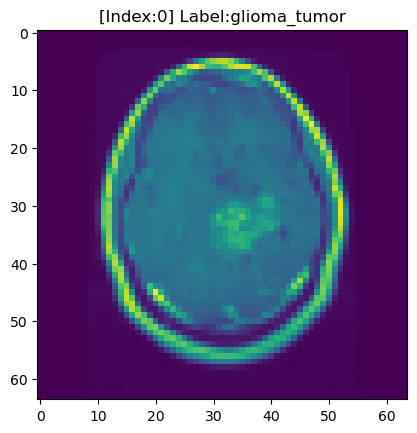

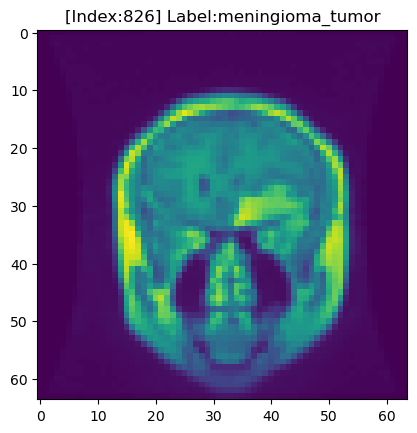

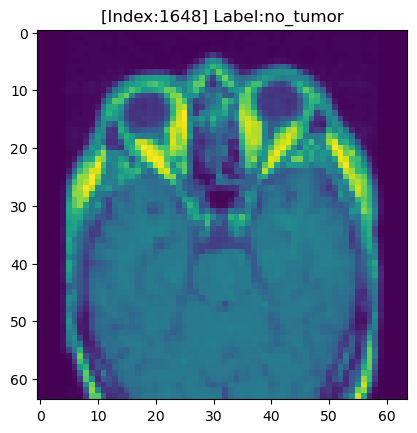

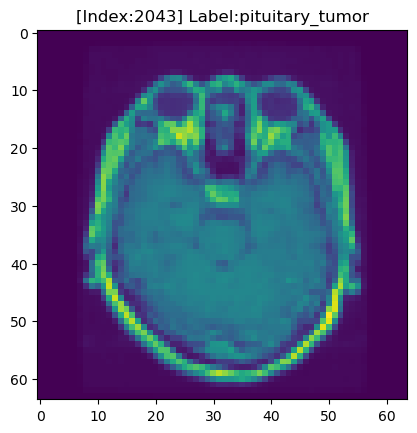

In [4]:
j = 0
for i in range(len(y)):
    if y[i] in labels[j]:
        plt.imshow(images[i])
        plt.title("[Index:{}] Label:{}".format(i, y[i]))
        plt.show()
        j += 1
    if j >= len(labels):
        break

In [10]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.0001, random_state=0)

# Classification with Scikit Learn Library (Programming Assignment)
### Variable Explanation (Do not change variable names)
- 'X_train' is feature vectors of training dataset
- 'y_train' is target labels of training dataset
- 'X_test' is feature vectors of test dataset
- 'y_test' is target labels of test dataset
- 'y_pred' was initialized as zero vectors and fill 'y_pred' with predicted labels

### Find the best model and hyperparameter for tumor classification
- Find the best random seed as well and fix it to reproduce your result on other computers.

In [6]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=500, random_state = 214243)
pca.fit(X_train)
X_train_pca500 = pca.transform(X_train)
X_test_pca500 = pca.transform(X_test)

pca = PCA(n_components=1000, random_state = 214243)
pca.fit(X_train)
X_train_pca1000 = pca.transform(X_train)
X_test_pca1000 = pca.transform(X_test)

In [19]:
knn = KNeighborsClassifier(n_neighbors=1)
svc = SVC(C=12, gamma=8)
knn.fit(X_train_pca500, y_train)
svc.fit(X_train_pca1000, y_train)
knn_pred = knn.predict(X_test_pca500)
svc_pred = svc.predict(X_test_pca1000)
y_pred = list()
for i in range(len(X_test_pca500)):
    if knn_pred[i] == labels[3]:
        y_pred.append(labels[3])
    else:
        y_pred.append(svc_pred[i])
y_pred = np.array(y_pred)

### Print accuracy (do not modify the following block)

In [10]:
print('Accuracy: %.2f' % sklearn.metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.00
